In [3]:
%pip install 'qiskit[visualization]'==1.1.0
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib

  Obtaining dependency information for qiskit[visualization]==1.1.0 from https://files.pythonhosted.org/packages/96/63/b9f41b662ce7f3d3b8f770c6b4bcb559ccdafaf454cb740d6063558a855e/qiskit-1.1.0-cp38-abi3-macosx_11_0_arm64.whl.metadata
  Using cached qiskit-1.1.0-cp38-abi3-macosx_11_0_arm64.whl.metadata (12 kB)
Using cached qiskit-1.1.0-cp38-abi3-macosx_11_0_arm64.whl (4.0 MB)
  Attempting uninstall: qiskit
    Found existing installation: qiskit 1.2.4
    Uninstalling qiskit-1.2.4:
      Successfully uninstalled qiskit-1.2.4
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install qiskit_finance

  Obtaining dependency information for qiskit_finance from https://files.pythonhosted.org/packages/69/4f/d4a8f06b2d20b6054822f4ebf63be21ac2f39aee84266bdd2318950048d9/qiskit_finance-0.4.1-py3-none-any.whl.metadata
  Obtaining dependency information for qiskit-optimization>=0.6.0 from https://files.pythonhosted.org/packages/a7/67/7669e6ad0b41b1e4ab79b592a4f1de748cac946169f5409e7a9f4bafef10/qiskit_optimization-0.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for nasdaq-data-link from https://files.pythonhosted.org/packages/a7/2a/f3c908206b530b93beaa90f0c645868a864bf7516fc0f0f5ed38f8f59fa1/Nasdaq_Data_Link-1.0.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for yfinance>=0.1.70 from https://files.pythonhosted.org/packages/8d/51/9f26741aeeb149fe75b30bceee389cf9920f9458d0f213539398aa217b99/yfinance-0.2.52-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.5/645.5 kB 1.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies

In [18]:
from qiskit_finance.circuit.library.probability_distributions import NormalDistribution
circuit = NormalDistribution(3, mu=0, sigma=2, bounds=(-2, 2))
circuit.decompose().draw(fold=-1)


┌─────────────────┐
q_0: ─────────────────────────────────────┤0                ├
                       ┌─────────────────┐│                 │
q_1: ──────────────────┤0                ├┤1 multiplexer_dg ├
     ┌────────────────┐│  multiplexer_dg ││                 │
q_2: ┤ multiplexer_dg ├┤1                ├┤2                ├
     └────────────────┘└─────────────────┘└─────────────────┘

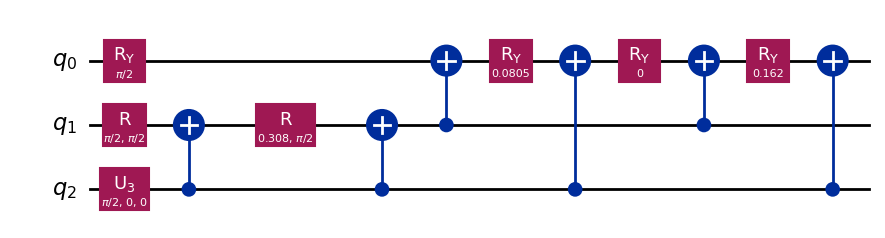

In [52]:
circuit.decompose(reps = 4).draw('mpl')


                                                                                                                                         ┌─────────────────┐
q_0: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                ├
                                                                                                                      ┌─────────────────┐│                 │
q_1: ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                ├┤1                ├
                                                                                                   ┌─────────────────┐│                 ││                 │
q_2: ──────────────────────────────────────────────────────────────────────────────────────────────┤0                ├┤1                ├┤2                ├
                                                          

/var/folders/2d/gdjgtkwx4vx5xq159w4nlq700000gn/T/ipykernel_46369/816653121.py:24: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  counts = {f'{i:0{circuit.num_qubits}b}': abs(amplitude)**2 for i, amplitude in enumerate(statevector)}


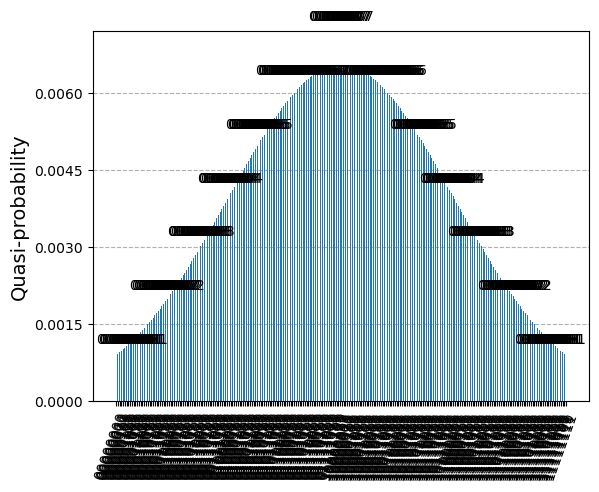

In [28]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit_finance.circuit.library.probability_distributions import NormalDistribution

# Create a Normal Distribution circuit with 3 qubits
circuit = NormalDistribution(8, mu=0, sigma=1, bounds=(-2, 2))

# Decompose and visualize the circuit
circuit_decomposed = circuit.decompose()
print(circuit_decomposed.draw(fold=-1))

# Execute the circuit on a statevector simulator
backend = Aer.get_backend('statevector_simulator')

# Transpile the circuit for the backend
transpiled_circuit = transpile(circuit_decomposed, backend)

# Run the transpiled circuit
result = backend.run(transpiled_circuit).result()

# Get the statevector and convert it to counts for visualization
statevector = result.get_statevector()
counts = {f'{i:0{circuit.num_qubits}b}': abs(amplitude)**2 for i, amplitude in enumerate(statevector)}

# Plot histogram of counts (amplitudes)
plot_histogram(counts)


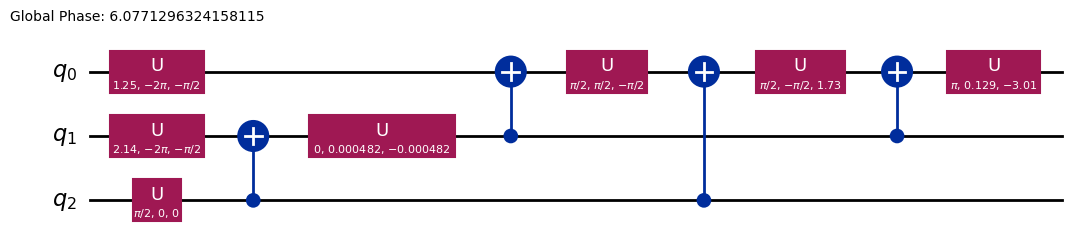

In [16]:
circuit.decompose(reps = 4).draw('mpl')


In [20]:
%pip install qiskit-qasm3-import

Note: you may need to restart the kernel to use updated packages.


In [30]:
from qiskit import *
from qiskit.providers.basic_provider import BasicProvider
import qiskit.qasm3
from qiskit.qasm3 import dumps
 
qasm_str = dumps(circuit.decompose(reps = 4))

print(qasm_str)
file_path = "depth_8.qasm"

with open(file_path, "w") as file:
    file.write(qasm_str)



OPENQASM 3.0;
include "stdgates.inc";
qubit[8] q;
U(1.5786700587549085, -2*pi, -pi/2) q[0];
U(1.5550508068544542, -2*pi, -pi/2) q[1];
U(1.6022718430330405, 0, -pi/2) q[2];
U(1.5079685882761382, -2*pi, -pi/2) q[3];
U(1.6954932350683931, 0, -pi/2) q[4];
U(1.3282770383524345, -2*pi, -pi/2) q[5];
U(2.0188140008759854, -2*pi, -pi/2) q[6];
U(pi/2, 0, 0) q[7];
cx q[7], q[6];
U(0, -2.105311448188667, 2.105311448188667) q[6];
cx q[6], q[5];
U(pi/2, pi/2, -pi/2) q[5];
cx q[7], q[5];
U(pi/2, -pi/2, 1.6902622526858069) q[5];
cx q[6], q[5];
U(pi, 3.1928506969558788, 0.051258043366085033) q[5];
cx q[5], q[4];
U(pi/2, pi/2, -pi/2) q[4];
cx q[6], q[4];
U(pi/2, -pi/2, 1.5710377143658385) q[4];
cx q[5], q[4];
U(pi/2, -3*pi/2, -pi/2) q[4];
cx q[7], q[4];
U(pi/2, -pi/2, 1.5086904359508724) q[4];
cx q[5], q[4];
U(pi/2, pi/2, -pi/2) q[4];
cx q[6], q[4];
U(pi/2, -pi/2, 1.539772821741372) q[4];
cx q[5], q[4];
U(0, 0.045898111841526125, -0.04589811184152596) q[4];
cx q[4], q[3];
U(pi/2, -3*pi/2, -pi/2) q[3];
c

In [53]:
simulator = Aer.get_backend('statevector_simulator')
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit
job = execute(compiled_circuit, backend=simulator)
result = job.result()

# Get statevector
statevector = result.get_statevector()

# Plot amplitude as a cityscape plot
plot_state_city(statevector, title="Amplitude Distribution")

NameError: name 'Aer' is not defined

In [23]:
circuit.decompose().decompose().draw()

»
q_0: ────────────────────────────────────────────────────────────────────»
                                                                         »
q_1: ────────────────────────────────────────────────────────────────────»
                                                                         »
q_2: ────────────────────────────────────────────────────────────────────»
                                                                         »
q_3: ────────────────────────────────────────────────────────────────────»
                                                                         »
q_4: ────────────────────────────────────────────────────────────────────»
                                                                         »
q_5: ────────────────────────────────────────────────────────────────────»
     ┌───────────────────────┐┌───┐┌───────────────────────────────┐┌───┐»
q_6: ┤ multiplex1_reverse_dg ├┤ X ├┤ multiplex1_reverse_reverse_dg ├┤ X ├»
     └──────┬─────────┬──────┘└─┬─┘└───────────────────────────────┘└─┬─┘»
q_7: ───────┤ Ry(π/2) ├─────────■─────────────────────────────────────■──»
            └─────────┘                                                  »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_3: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_4: ──────────────────────────────────────────────────────────────────────»
«     ┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐»
«q_5: ┤0                       ├┤ X ├┤0                               ├┤ X ├»
«     │  multiplex2_reverse_dg │└─┬─┘│  multiplex2_reverse_reverse_dg │└─┬─┘»
«q_6: ┤1                       ├──┼──┤1                               ├──┼──»
«     └────────────────────────┘  │  └────────────────────────────────┘  │  »
«q_7: ────────────────────────────■──────────────────────────────────────■──»
«                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_1: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_2: ──────────────────────────────────────────────────────────────────────»
«                                                                           »
«q_3: ──────────────────────────────────────────────────────────────────────»
«     ┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐»
«q_4: ┤0                       ├┤ X ├┤0                               ├┤ X ├»
«     │                        │└─┬─┘│                                │└─┬─┘»
«q_5: ┤1 multiplex3_reverse_dg ├──┼──┤1 multiplex3_reverse_reverse_dg ├──┼──»
«     │                        │  │  │                                │  │  »
«q_6: ┤2                       ├──┼──┤2                               ├──┼──»
«     └────────────────────────┘  │  └────────────────────────────────┘  │  »
«q_7: ────────────────────────────■──────────────────────────────────────■──»
«                                                                           »
«                                                                           »
«q_0: ──────────────────────────────────────────────────────────────

In [24]:
circuit.decompose().decompose().decompose().draw(fold=-1)

┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐
q_0: ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                       ├┤ X ├┤0                               ├┤ X ├┤0                                       ├┤ X ├┤0                               ├┤ X ├
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          ┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐│                        │└─┬─┘│                                │└─┬─┘│                                        │└─┬─┘│                                │└─┬─┘
q_1: ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                       ├┤ X ├┤0                               ├┤ X ├┤0                                       ├┤ X ├┤0                               ├┤ X ├┤1                       ├──┼──┤1                               ├──┼──┤1                                       ├──┼──┤1                               ├──┼──
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐│                        │└─┬─┘│                                │└─┬─┘│                                        │└─┬─┘│                                │└─┬─┘│                        │  │  │                                │  │  │                                        │  │  │                              

In [25]:
circuit.decompose().decompose().decompose().decompose().draw(fold=-1)

┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐
q_0: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                       ├┤ X ├┤0                               ├┤ X ├┤0                                       ├┤ X ├┤0                               ├┤ X ├┤0                                       ├┤ X ├┤0                                               ├┤ X ├┤0                                       ├┤ X ├┤0                               ├┤ X ├
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐│                        │└─┬─┘│                                │└─┬─┘│                                        │└─┬─┘│                                │└─┬─┘│                                        │└─┬─┘│                                                │└─┬─┘│                                        │└─┬─┘│                                │└─┬─┘
q_1: ──────────────────────────────────────

In [26]:
circuit.decompose().decompose().decompose().decompose().decompose().draw(fold=-1)

┌────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────────────────────┐┌───┐┌────────────────────────────────────────────────────────┐┌───┐┌────────────────────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────────────────────┐┌───┐┌────────────────────────────────────────┐┌───┐┌────────────────────────────────┐┌───┐
q_0: ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0                       ├┤ X ├┤0                               ├┤ X ├┤0                                       ├┤ X ├┤0                               ├┤ X ├┤0                                       ├┤ X ├┤0                                               ├┤ X ├┤0                                       ├┤ X ├┤0                               ├┤ X ├┤0                                       ├┤ X ├┤0                                               ├┤ X ├┤0                                                       ├┤ X ├┤0                                               ├┤ X ├┤0                                       ├┤ X ├┤0                                               ├┤ X ├┤0                                       ├┤ X ├┤0                               ├┤ X ├
                